## Setup


In [29]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 1. Membaca dan menjelajahi dataset

In [30]:
import pandas as pd

## Baca CSV
data = pd.read_csv("./ecommerce_customer_data_custom_ratios.csv")

## Tampilkan 5 baris pertama
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [31]:
## Lihat struktur (info()), tipe data, dan ringkasan statistik (describe()).
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [32]:
# Cek distribusi target
print(data.value_counts())

Customer ID  Purchase Date        Product Category  Product Price  Quantity  Total Purchase Amount  Payment Method  Customer Age  Returns  Customer Name      Age  Gender  Churn
1            2023-07-19 19:09:20  Books             169            5         3491                   PayPal          70            1.0      Nicole Johnson     70   Male    0        1
33341        2022-07-07 16:07:27  Electronics       354            3         1110                   Crypto          55            0.0      Caleb Hunt         55   Male    0        1
33342        2021-01-21 22:38:17  Books             218            5         4102                   Crypto          62            0.0      William Rogers     62   Female  0        1
             2021-03-10 01:04:27  Clothing          347            5         2910                   Crypto          62            1.0      William Rogers     62   Female  0        1
             2022-01-09 18:28:43  Books             327            1         527               

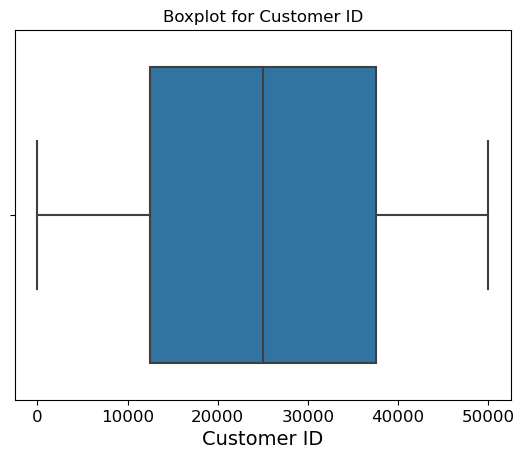

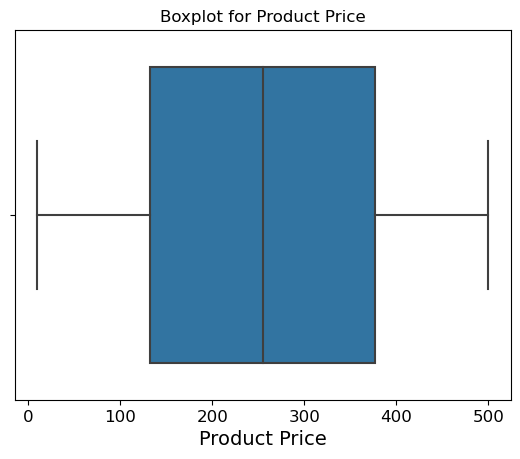

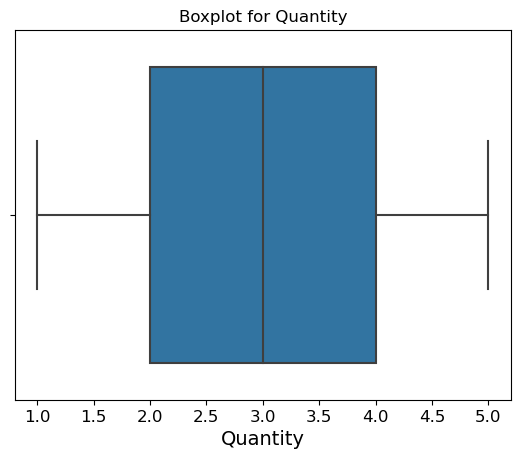

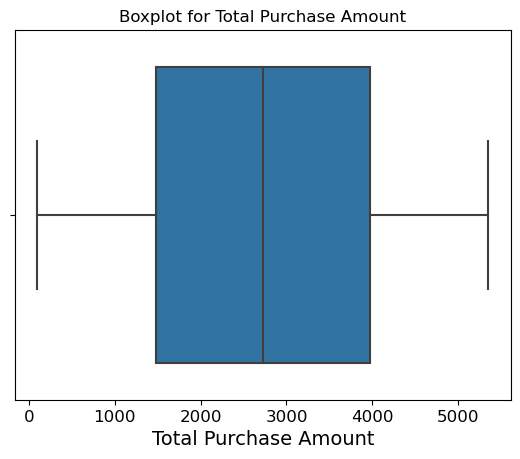

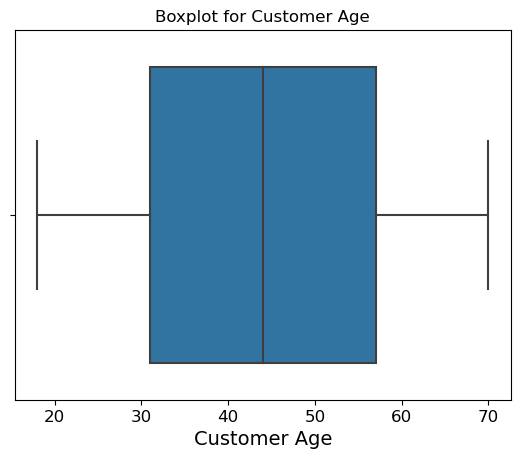

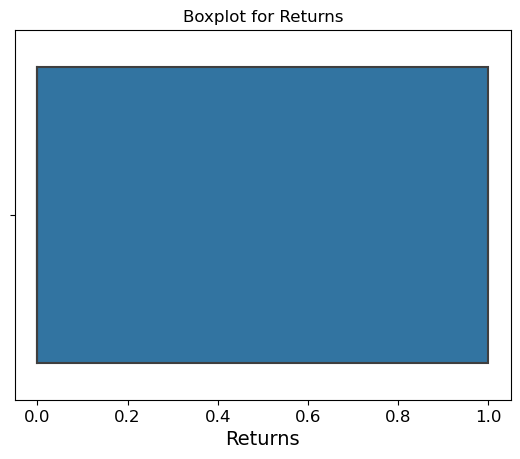

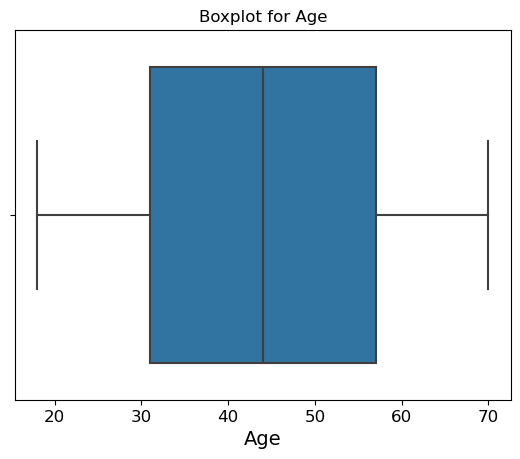

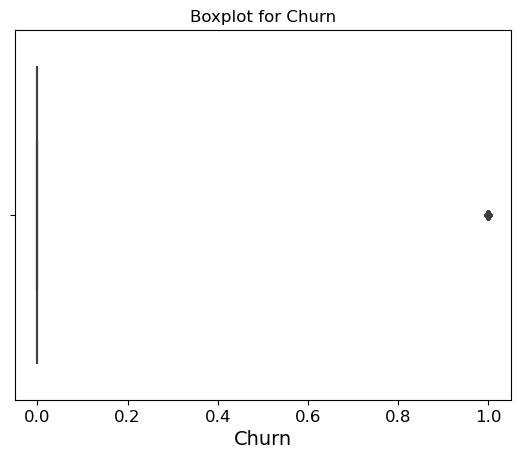

In [33]:
# Cek outliers
import seaborn as sns
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col}')
        plt.show()


### 2. Pembersihan Data

In [34]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [35]:
# Cek data yang null dan handle
data = data.drop_duplicates()
data.isnull().sum()
# Returns banyak null (47596)

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [36]:
data['Returns'] = data['Returns'].fillna(data['Returns'].median())
data.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [37]:
# Cek dan hapus duplikat
data.duplicated().sum()

0

In [38]:
data = data.drop_duplicates()
data.duplicated().sum()

data.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.403076,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.490517,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


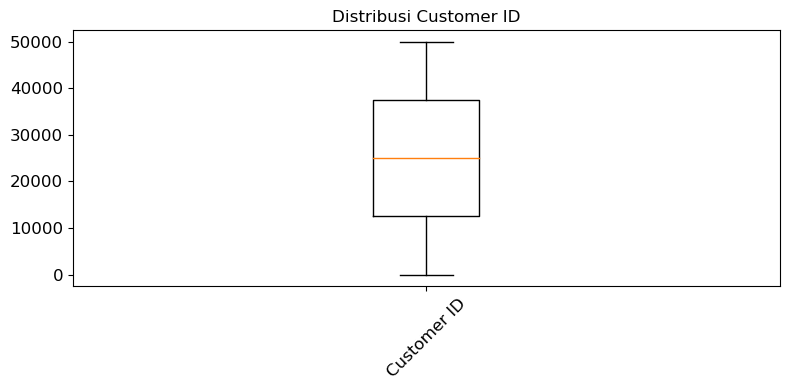

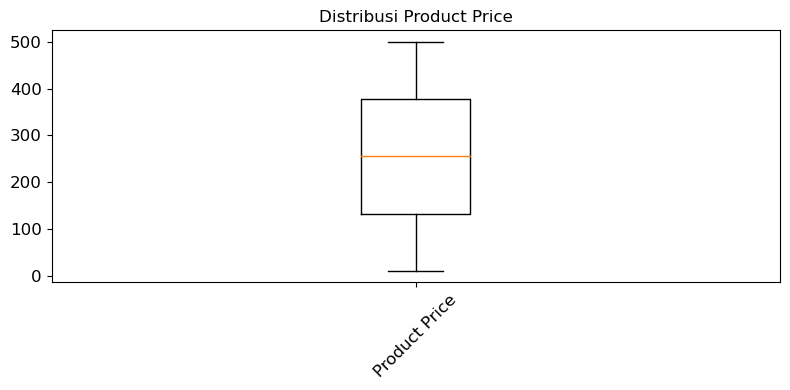

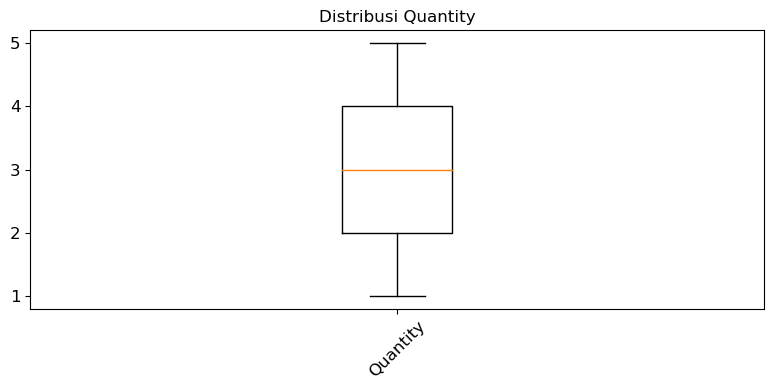

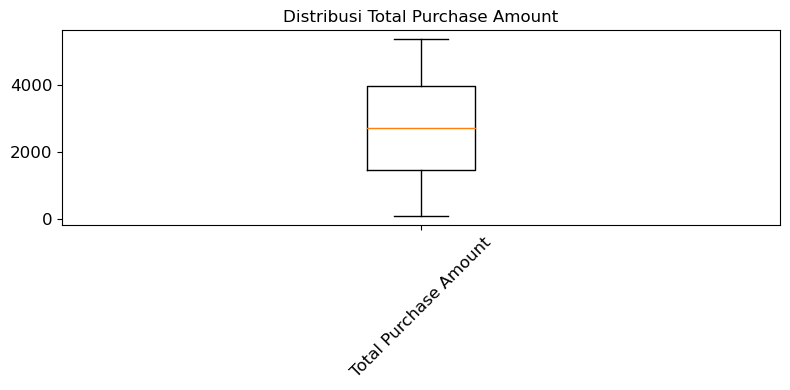

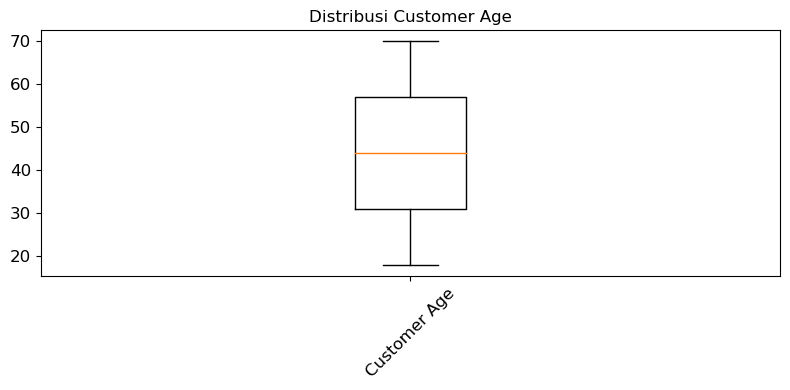

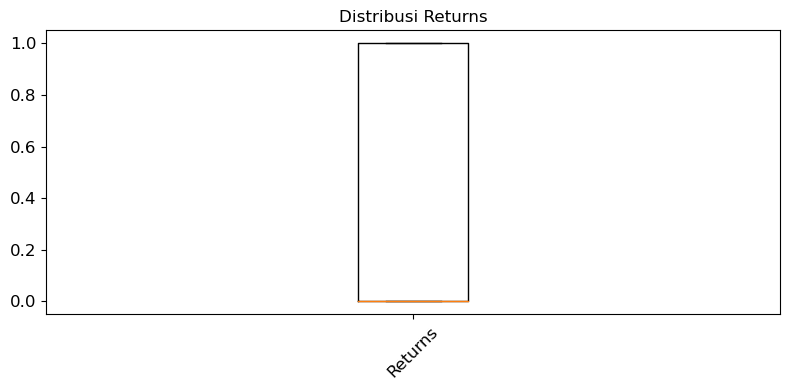

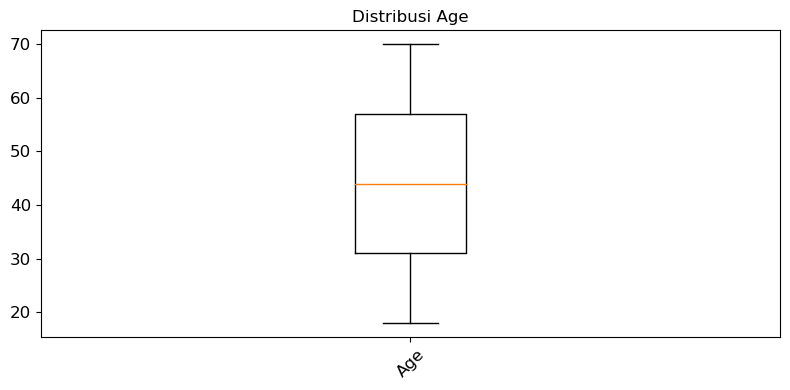

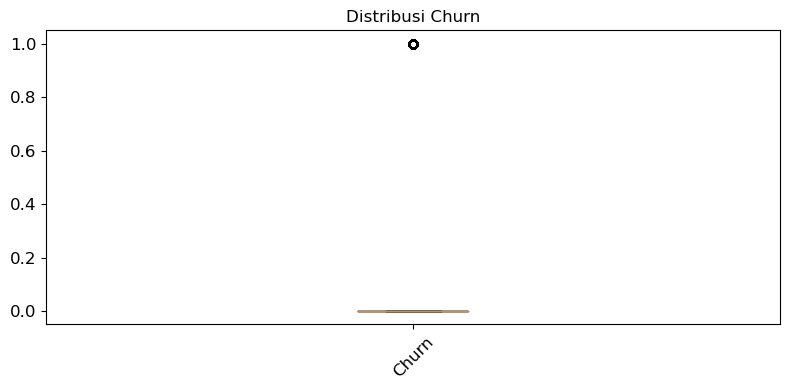

In [39]:
# Handle data outlier/pencilan/anomali
import seaborn as sns

fitur_pilihan = data.select_dtypes(include=[np.number]).columns.tolist()

for col in fitur_pilihan:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[col])
    plt.title(f"Distribusi {col}")
    plt.xticks([1], [col], rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Encoding Fitur Kategorikal

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# le = LabelEncoder()
# ohe = OneHotEncoder(sparse=False)

categorical_cols = ['Product Category', 'Payment Method', 'Customer Name', 'Gender']

ct = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_cols)
    ],
    remainder='passthrough' 
)

data_encoded = ct.fit_transform(data)

data_encoded.head()

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MemoryError: Unable to allocate 74.4 GiB for an array with shape (250000, 39930) and data type float64

### 4. Transformasi Fitur (Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Drop churn
X = data_encoded[["Product Price", "Quantity", "Total Purchase Amount", "Customer Age"]]
y = data_encoded['Churn']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### 5. Penanganan Data Imbalanced